# MLP AGENT visualization

## 1. Setup and Imports

In [1]:
import os
import sys

try:
    base_path = os.path.dirname(__file__)
except NameError:
    base_path = os.getcwd()

# 1️⃣ Ajouter le dossier parent (un cran au-dessus)
parent_dir = os.path.abspath(os.path.join(base_path, '..'))
sys.path.append(parent_dir)

# 2️⃣ Ajouter le dossier parent du dossier parent (deux crans au-dessus)
two_up_dir = os.path.abspath(os.path.join(base_path, '..', '..'))
sys.path.append(two_up_dir)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Import the environment and agents
from permuted_mnist.env.permuted_mnist import PermutedMNISTEnv
from models.MLP.agent_Bruce_Wayne import Agent as Bruce_Wayne_Agent
from models.MLP.agent_James_Bond import Agent as James_Bond_Agent
from models.MLP.agent_James_Bond_New_Generation_1 import Agent as James_Bond_New_Generation_1_Agent
from models.MLP.agent_James_Bond_New_Generation_2 import Agent as James_Bond_New_Generation_2_Agent

# Import the visualization function
from utils.visualization import Comparison_plots

print("✓ Imports successful")

✓ Imports successful


We fix the seed for reproducibility:

In [3]:
seed = 42

We fix the number of CPUs:

In [4]:
n_jobs = 2

## 2. Create the Environment

Let's create an environment with 10 different permuted tasks:

In [5]:
# Create environment with 10 episodes (tasks)
env = PermutedMNISTEnv(number_episodes=10)

# Set seed for reproducibility
env.set_seed(seed)

print(f"Environment created with {env.number_episodes} permuted tasks")
print(f"Training set size: {env.train_size} samples")
print(f"Test set size: {env.test_size} samples")

Environment created with 10 permuted tasks
Training set size: 60000 samples
Test set size: 10000 samples


## MLP comparison :

In [6]:
def MLP(Agent):
    # Reset environment for fresh start
    env.reset()
    env.set_seed(seed)

    # Create MLP agent
    mlp_agent = Agent()

    # Track performance
    mlp_accuracies = []
    mlp_times = []

    print(f"Evaluating Agent:")

    # Evaluate on all tasks
    task_num = 1
    while True:
        task = env.get_next_task()
        if task is None:
            break
        if task_num >= 4: # limite for quick test
            break
            
        # Reset agent for new task
        mlp_agent.reset()
    
        start_time = time.time()
    
        # Train
        mlp_agent.train(task['X_train'], task['y_train'])
    
        # Make predictions
        predictions = mlp_agent.predict(task['X_test'])
    
        # Calculate time and accuracy
        elapsed_time = time.time() - start_time
        accuracy = env.evaluate(predictions, task['y_test'])
    
        mlp_accuracies.append(accuracy)
        mlp_times.append(elapsed_time)
    
        print(f"Task {task_num}: Accuracy = {accuracy:.2%}, Time = {elapsed_time:.4f}s")
        task_num += 1

    mean_accuracy = np.mean(mlp_accuracies)
    std_accuracy = np.std(mlp_accuracies)
    total_time = np.sum(mlp_times)

    print(f"\nMLP Agent Summary:")
    print(f"  Mean accuracy: {mean_accuracy:.2%} ± {std_accuracy:.2%}")
    print(f"  Total time: {total_time:.2f}s")

    return mean_accuracy, mlp_accuracies, mlp_times

In [7]:
mean_accuracy_Wayne, accuracies_Wayne, times_Wayne = MLP(Bruce_Wayne_Agent)

Evaluating Agent:
Task 1: Accuracy = 97.59%, Time = 64.3429s
Task 2: Accuracy = 97.76%, Time = 60.4829s
Task 3: Accuracy = 97.53%, Time = 59.5714s

MLP Agent Summary:
  Mean accuracy: 97.63% ± 0.10%
  Total time: 184.40s


In [8]:
mean_accuracy_Bond, accuracies_Bond, times_Bond = MLP(James_Bond_Agent)

Evaluating Agent:
Task 1: Accuracy = 98.44%, Time = 59.4009s
Task 2: Accuracy = 98.44%, Time = 59.4886s
Task 3: Accuracy = 98.25%, Time = 59.2426s

MLP Agent Summary:
  Mean accuracy: 98.38% ± 0.09%
  Total time: 178.13s


In [9]:
mean_accuracy_NG1, accuracies_NG1, times_NG1 = MLP(James_Bond_New_Generation_1_Agent)

Evaluating Agent:
Task 1: Accuracy = 98.66%, Time = 58.2380s
Task 2: Accuracy = 98.68%, Time = 50.0038s
Task 3: Accuracy = 98.63%, Time = 58.0506s

MLP Agent Summary:
  Mean accuracy: 98.66% ± 0.02%
  Total time: 166.29s


In [10]:
mean_accuracy_NG2, accuracies_NG2, times_NG2 = MLP(James_Bond_New_Generation_2_Agent)

Evaluating Agent:
Task 1: Accuracy = 98.54%, Time = 58.2622s
Task 2: Accuracy = 98.56%, Time = 58.1792s
Task 3: Accuracy = 98.63%, Time = 58.2414s

MLP Agent Summary:
  Mean accuracy: 98.58% ± 0.04%
  Total time: 174.68s


### MLP Visualization :

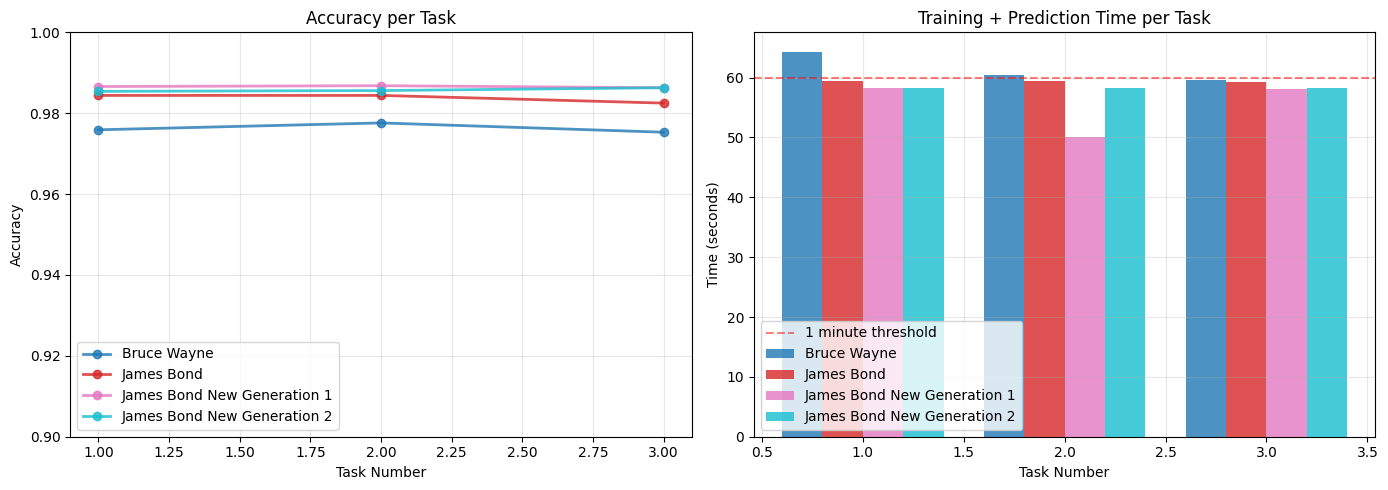

In [11]:
List = [
    [accuracies_Wayne, times_Wayne, "Bruce Wayne"],
    [accuracies_Bond, times_Bond, "James Bond"],
    [accuracies_NG1, times_NG1, "James Bond New Generation 1"],
    [accuracies_NG2, times_NG2, "James Bond New Generation 2"]
]

Comparison_plots(*List)